In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
l = []
for i in range(1880,2019):
    x = pd.read_csv('yob'+ str(i) + '.txt', names = ['Nombre', 'Sexo', 'Cantidad'])
    x['Año'] = i
    l.append(x)
df = pd.concat(l)

### **Cantidad de nombres**

In [3]:
nombres = np.unique(list(df['Nombre'].values))
'{:,.0f}'.format(len(nombres))
f'{len(nombres):,.0f}'

'98,432'

### **Nombres a través del tiempo**

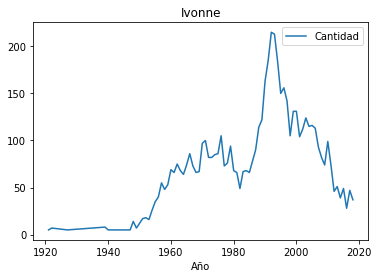

In [4]:
nombre = 'Ivonne'
df[(df['Nombre'] == nombre) & (df['Sexo'] == 'F')].plot('Año', 'Cantidad', title = nombre)
plt.show()

In [5]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

data = df[(df['Nombre'] == nombre) & (df['Sexo'] == 'F')]
fig = px.line(data, x="Año", y="Cantidad", title=nombre)
fig.show()

In [6]:
data[data['Cantidad'] == data['Cantidad'].max()]

,Nombre,Sexo,Cantidad,Año
909,Ivonne,F,215,1992


### **Nombres más populares de todos los tiempos**

In [7]:
df.iloc[:, :3].groupby('Nombre').sum().sort_values('Cantidad', ascending = False).head()

,Cantidad
Nombre,
James,5188027
John,5146825
Robert,4840447
Michael,4384810
Mary,4141008


### **Nombres más populares de  los últimos 10 años**

In [8]:
df[df['Año']>=2010].iloc[:, :3].groupby('Nombre').sum().sort_values('Cantidad', ascending = False).head(10)

,Cantidad
Nombre,
Emma,177716
Sophia,167297
Olivia,165896
Noah,164891
Isabella,157052
Liam,153348
Jacob,152374
Mason,146897
William,146230


### **Nombres que terminan en ____**

In [9]:
ildas = [i for i in nombres if i.endswith('ilda')]

In [10]:
np.unique(ildas).size

39

### **Nombres más populares que empiezan con Mari**

In [11]:
#df[df['Nombre'] == 'Mary']

In [12]:
df[df['Nombre'].map(lambda x: x.startswith('Mari')) & (df['Sexo'] == 'F')].iloc[:, :3].groupby('Nombre').sum().sort_values('Cantidad', ascending = False).head(10)

,Cantidad
Nombre,
Maria,546163
Marie,536708
Marilyn,370828
Marion,188391
Marian,140555
Marissa,119523
Mariah,108609
Marianne,64878
Marisa,48375


### **Nombres con mayor tasa de crecimiento en los últimos 5 años**

In [13]:
#df.sort_values(['Nombre', 'Año])
#df5 = df[(df['Año']>=2013) & (df['Sexo']=='F')].set_index('Nombre')
#df5.loc['Maria']
df2 = df.set_index('Año')

In [14]:
#data = ¨['Cantidad'].iloc[-5:]

In [15]:
#tasas = data/data.shift(1)-1

In [16]:
#tasas.mean()

In [17]:
#datos = {nombre: df2[(df2['Nombre']==nombre) & (df2['Sexo']=='F')]['Cantidad'].iloc[-5:] for nombre in np.unique(nombres)}

In [18]:
df2[(df2['Nombre']=='Maria') & (df2['Sexo']=='F')].iloc[-6:]

,Nombre,Sexo,Cantidad
Año,,,
2013,Maria,F,2818
2014,Maria,F,2771
2015,Maria,F,2826
2016,Maria,F,2807
2017,Maria,F,2710
2018,Maria,F,2610


In [19]:
np.unique(df[df['Año']>=2012]['Nombre'].values).size

49388

In [20]:
df[df['Año']>=2012].groupby(['Nombre','Año']).sum()

Cantidad
Nombre Año           
Aaban  2012        11
       2013        14
       2014        16
       2015        15
       2016         9
...               ...
Zyva   2017         9
       2018         6
Zyvon  2015         7
Zyyon  2014         6
Zzyzx  2018         5

[213618 rows x 1 columns]